## Spotify Project - Data & EDA
This notebook is to clean the data and complete EDA.

In [331]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Read in the data set from Kaggle. (https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify)

In [332]:
df = pd.read_csv('../data/genres_v2.csv')
df.head()

c:\repo\ga\venv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


2. Check for null values and drop columns.

In [333]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [334]:
df.shape

(42305, 22)

The columns Unnamed: 0, is a left over index from the data that needs to be dropped.

In [335]:
df.drop(columns= ['Unnamed: 0'], inplace=True)

The song title and song name contain alot of null values, in order to prep them for modeling and not lose this data I
will look further into these two columns.

In [336]:
titles = df[df['title'].notnull()]
titles['song_name'].unique()


array([nan], dtype=object)

In [337]:
song_name = df[df['song_name'].notnull()]
song_name['title'].unique()

array([nan], dtype=object)

This bit of code shows that the song name and title columns can be combined as there are no songs with a title and a
song_name.

In [338]:
# https://stackoverflow.com/questions/41449555/pandas-combine-two-columns-with-null-values
df['song_name'] = df['song_name'].fillna(df['title'])
df.drop(columns= 'title', inplace=True)

df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
song_name           6
dtype: int64

There are still 6 null values for song_name as these could be untitled, I am converting the nan values to empty strings.

In [339]:
df.fillna('', inplace= True)

The song names cannot be modeled as they are simple strings.  I will need to extract numerical value from the song
titles by looking at the character and word counts.

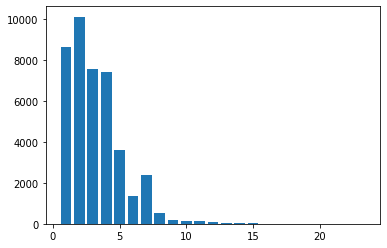

In [340]:
df['song_name_char_count'] = [len(song) for song in df['song_name']]
df['song_name_word_count'] = [len(song.split(' ')) for song in df['song_name']]

plt.bar(height= df.song_name_word_count.value_counts(), x = df.song_name_word_count.value_counts().index);

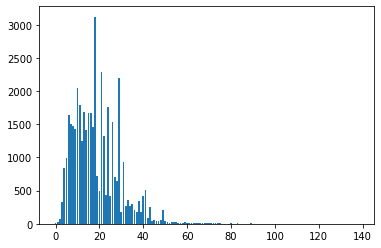

In [341]:
plt.bar(height= df.song_name_char_count.value_counts(), x = df.song_name_char_count.value_counts().index);

3. Check data types and correct any issues within dataset

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   danceability          42305 non-null  float64
 1   energy                42305 non-null  float64
 2   key                   42305 non-null  int64  
 3   loudness              42305 non-null  float64
 4   mode                  42305 non-null  int64  
 5   speechiness           42305 non-null  float64
 6   acousticness          42305 non-null  float64
 7   instrumentalness      42305 non-null  float64
 8   liveness              42305 non-null  float64
 9   valence               42305 non-null  float64
 10  tempo                 42305 non-null  float64
 11  type                  42305 non-null  object 
 12  id                    42305 non-null  object 
 13  uri                   42305 non-null  object 
 14  track_href            42305 non-null  object 
 15  analysis_url       

4. Check value distributions of object type columns.

>Column: type

In [343]:
df.type.value_counts()

#all data has the same type so I am dropping this column.
df.drop(columns='type', inplace=True)

> Column: id

In [344]:
df.id.value_counts()

7D5qMGajdfznFcXFArk5VE    9
5lXY6PTuWXOludKy4zDQwM    8
3BSuC9Y6MhalaLlhyNbTYZ    8
5cRDn5aGMLvWsldoRmOOz0    8
71NOmiKvk7s5R7dUurNjuy    7
                         ..
1oAM198GGvgmSJlPFAZXl7    1
1vUWUXgq30ns7e4t7bOErg    1
0KrJ0a9CLonKGmrtHj73qX    1
5DRLaeCjWywlE12f4w7GsO    1
4AnstjlAxgNRjym4uQQsju    1
Name: id, Length: 35877, dtype: int64

These are string ids for the songs in the dataset.  These values should be dropped as there are too many unique values
that will make the model over fit.

In [345]:
# df.drop(columns='id', inplace= True)

> Column: uri

In [346]:
df.uri.value_counts()

spotify:track:7D5qMGajdfznFcXFArk5VE    9
spotify:track:5lXY6PTuWXOludKy4zDQwM    8
spotify:track:5cRDn5aGMLvWsldoRmOOz0    8
spotify:track:3BSuC9Y6MhalaLlhyNbTYZ    8
spotify:track:2KVv2zAjDHxymySY5EIaAz    7
                                       ..
spotify:track:1hGDmzHWtF4xVsEZvc9eBx    1
spotify:track:2JuHCdCYrxxONfduXbFPJQ    1
spotify:track:7EQmmdgzdUKqtQHjDoBBX8    1
spotify:track:5ishNhnf0TC4HhF1ltBUyH    1
spotify:track:2aanwQBC5xbfYV0fnHMmY3    1
Name: uri, Length: 35877, dtype: int64

This column contains similar data as in the id column.  This coulmn should be dropped as well to prevent creating too
many features when dummying the columns.

In [347]:
df.drop(columns='uri', inplace= True)

> Column: track_href

track_href is the url for the specific track. This column will not make give good data fro the model and will be dropped.

In [348]:
df.drop(columns='track_href', inplace= True)

> Column: analysis_url

In [349]:
df.analysis_url.value_counts()

https://api.spotify.com/v1/audio-analysis/7D5qMGajdfznFcXFArk5VE    9
https://api.spotify.com/v1/audio-analysis/5cRDn5aGMLvWsldoRmOOz0    8
https://api.spotify.com/v1/audio-analysis/5lXY6PTuWXOludKy4zDQwM    8
https://api.spotify.com/v1/audio-analysis/3BSuC9Y6MhalaLlhyNbTYZ    8
https://api.spotify.com/v1/audio-analysis/2KVv2zAjDHxymySY5EIaAz    7
                                                                   ..
https://api.spotify.com/v1/audio-analysis/0IV9xAURsvFJSXDIYtn9HH    1
https://api.spotify.com/v1/audio-analysis/4OsLDuaH0bWR6xM6nj66F8    1
https://api.spotify.com/v1/audio-analysis/24IrP2JO8TBzMospzX3t5x    1
https://api.spotify.com/v1/audio-analysis/7tK4BTL5Uple17rMiodHDi    1
https://api.spotify.com/v1/audio-analysis/5kpvLA31hZznUInLZ3yfXP    1
Name: analysis_url, Length: 35877, dtype: int64

This column contains similar data as in the track_href column.  This column should be dropped as well to prevent creating too
many features when dummying the columns.

In [350]:
df.drop(columns='analysis_url', inplace=True)

4. Check values of the numerical data in the data set.


In [351]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_name_char_count,song_name_word_count
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,18.852594,3.210590
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,10.763208,2.023564
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,11.000000,2.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,17.000000,3.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,25.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,138.000000,23.000000


<Figure size 1440x1080 with 0 Axes>

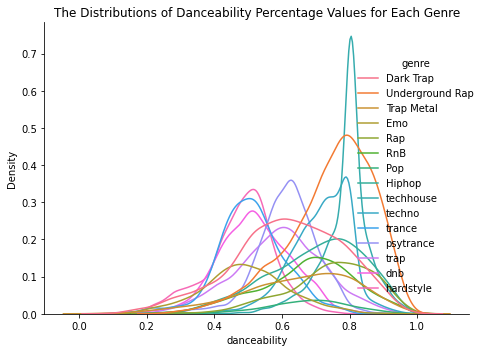

In [352]:
df.danceability.value_counts()

plt.figure(figsize=(20,15))
sns.displot(x= df['danceability'], hue= df['genre'], kind='kde')
plt.title("The Distributions of Danceability Percentage Values for Each Genre")
plt.tight_layout()
plt.savefig('../imgs/danceability_dist.png', dpi=400, bbox_inches= 'tight')

These are percentage values the describe the danceability in the song.

<Figure size 1440x1080 with 0 Axes>

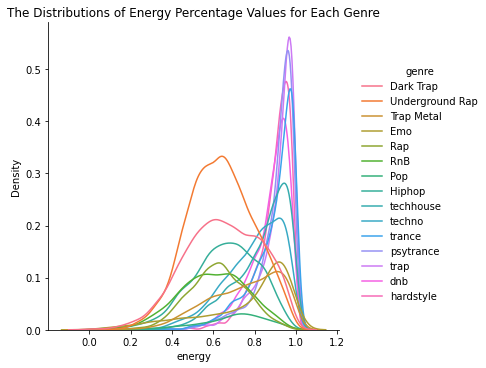

In [353]:
df.energy.value_counts()

plt.figure(figsize=(20,15))
sns.displot(x= df['energy'], hue= df['genre'], kind='kde')
plt.title("The Distributions of Energy Percentage Values for Each Genre")
plt.savefig('../imgs/energy_dist.png', dpi=400,  bbox_inches= 'tight')

These are percentage values that describe the energy in the song.

<Figure size 1440x1080 with 0 Axes>

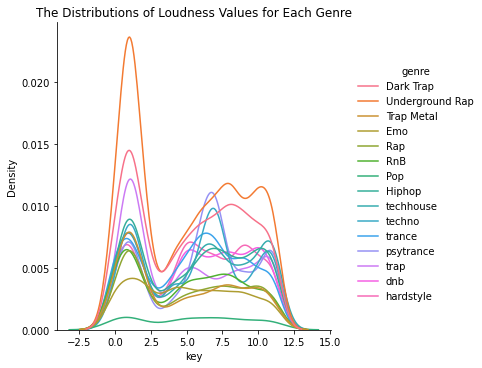

In [354]:
df.key.value_counts()

plt.figure(figsize=(20,15))
sns.displot(x= df['key'], hue= df['genre'], kind='kde')
plt.title("The Distributions of Loudness Values for Each Genre")

plt.savefig('../imgs/key_dist.png', dpi=400,  bbox_inches= 'tight')
plt.show()

This is the key of the song denoted by numbers from 0-11. These are class like values and will need to be dummified to model as these values should not be treated like numbers.

<Figure size 1440x1080 with 0 Axes>

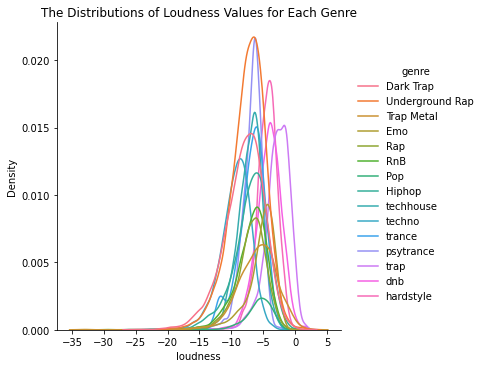

In [355]:
df.loudness.describe()

plt.figure(figsize=(20,15))
sns.displot(x= df['loudness'], hue= df['genre'], kind='kde')
plt.title("The Distributions of Loudness Values for Each Genre")
plt.savefig('../imgs/loudness_dist.png', dpi=400,  bbox_inches= 'tight')

These are numeric values that describe the loudness of the song.

In [356]:
df['mode'].value_counts()

1    23245
0    19060
Name: mode, dtype: int64

This is a column made up of ones and zeros depicting the mode of the song, where 1 is the song is on the major scale and
0 is not.

<Figure size 1440x720 with 0 Axes>

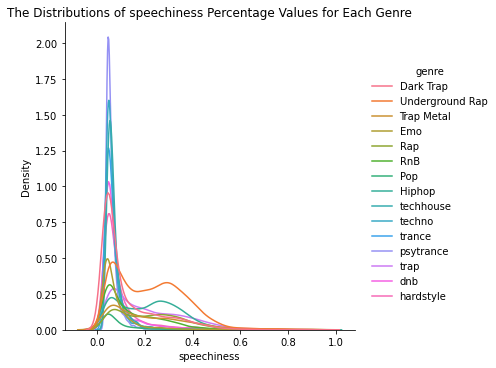

In [357]:
df.speechiness.describe()

plt.figure(figsize=(20,10))
sns.displot(x= df['speechiness'], hue= df['genre'], kind='kde')
plt.title("The Distributions of speechiness Percentage Values for Each Genre")
plt.savefig('../imgs/speechiness_dist.png', dpi=400,  bbox_inches= 'tight')

These are numeric percentages that describe the speechiness quality of the song.

<Figure size 1440x720 with 0 Axes>

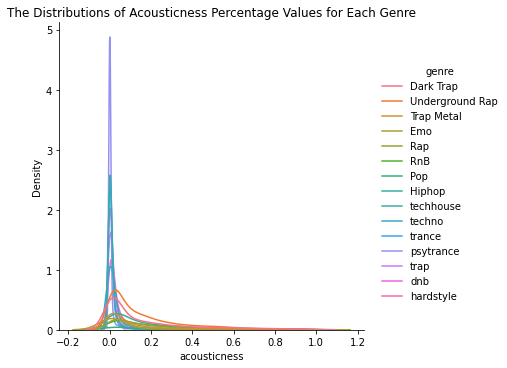

In [358]:
df.acousticness.describe()

plt.figure(figsize=(20,10))
sns.displot(x= df['acousticness'], hue= df['genre'], kind='kde')
plt.title("The Distributions of Acousticness Percentage Values for Each Genre")
plt.savefig('../imgs/acousticness_dist.png', dpi=400,  bbox_inches= 'tight')

These are numeric percentages that describe the acousticness percentage of the song.

<Figure size 1440x720 with 0 Axes>

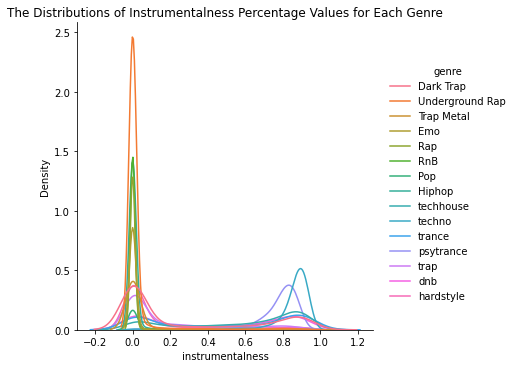

In [359]:
df.instrumentalness.describe()

plt.figure(figsize=(20,10))
sns.displot(x= df['instrumentalness'], hue= df['genre'], kind='kde')
plt.title("The Distributions of Instrumentalness Percentage Values for Each Genre")
plt.savefig('../imgs/instrumentalness_dist.png', dpi=400,  bbox_inches= 'tight')

These are numeric percentages that describe the instrumental percentage of the song.

<Figure size 1440x720 with 0 Axes>

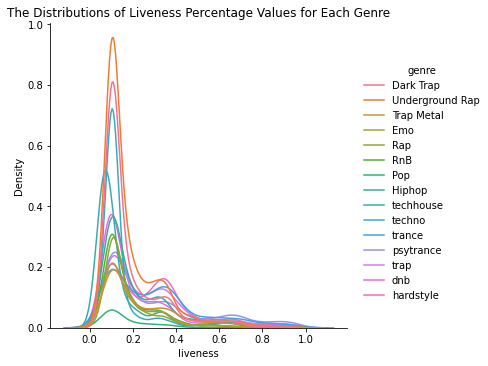

In [360]:
df.liveness.describe()

plt.figure(figsize=(20,10))
sns.displot(x= df['liveness'], hue= df['genre'], kind='kde')
plt.title("The Distributions of Liveness Percentage Values for Each Genre")
plt.savefig('../imgs/liveness_dist.png', dpi=400, bbox_inches= 'tight')

These are numeric percentages that describe the liveness quality of the song.


<Figure size 1440x720 with 0 Axes>

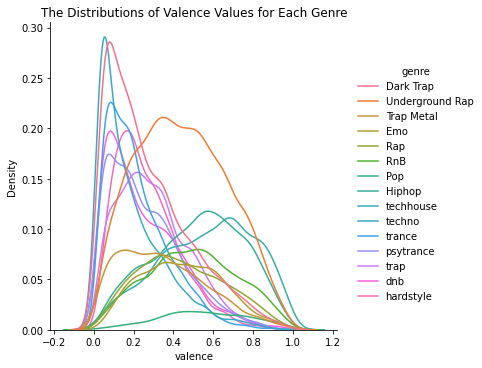

In [361]:
df.valence.describe()
plt.figure(figsize=(20,10))
sns.displot(x= df['valence'], hue= df['genre'], kind='kde')
plt.title("The Distributions of Valence Values for Each Genre")
plt.savefig('../imgs/valence_dist.png', dpi=400, bbox_inches= 'tight')
# plt.figure(figsize=(15,10))
# sns.scatterplot(x= df['genre'], y = df['valence'], hue= df['genre'])

This is a percentage value that describes how happy a song sounds.

<Figure size 1440x1080 with 0 Axes>

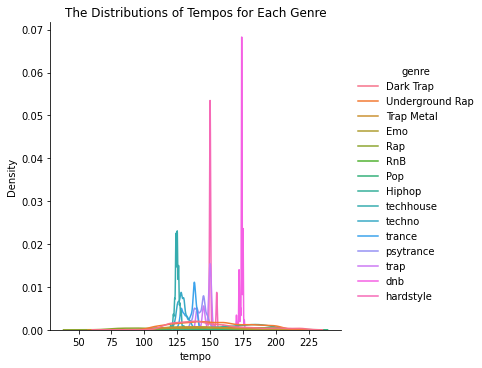

In [362]:
df.tempo.describe()

plt.figure(figsize=(20,15))
sns.displot(x= df['tempo'], hue= df['genre'], kind='kde')
plt.title("The Distributions of Tempos for Each Genre")
plt.savefig('../imgs/valence_dist.png', dpi=400, bbox_inches= 'tight')

<Figure size 1440x720 with 0 Axes>

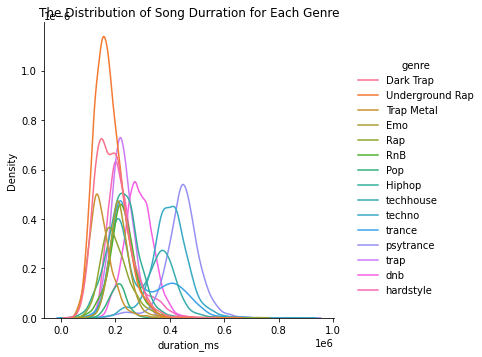

In [363]:
df.duration_ms.describe()

plt.figure(figsize=(20,10))
sns.displot(x= df['duration_ms'], hue= df['genre'], kind='kde')
plt.title("The Distribution of Song Duration for Each Genre")
plt.savefig('../imgs/time_dist.png', dpi=400, bbox_inches= 'tight')

These are the song durations in milliseconds. These are numeric values.

<Figure size 1440x720 with 0 Axes>

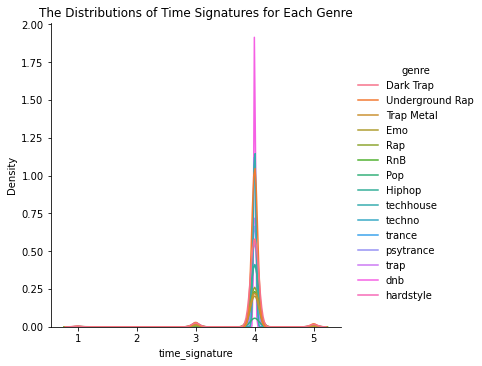

In [364]:
df.time_signature.value_counts()

plt.figure(figsize=(20,10))
sns.displot(x= df['time_signature'], hue= df['genre'], kind='kde')
plt.title("The Distributions of Time Signatures for Each Genre")
plt.savefig('../imgs/time_sig_dist.png', dpi=400, bbox_inches= 'tight')

This is a class like integer that shows the time signature of the song.

Plot the distributions of the genres.

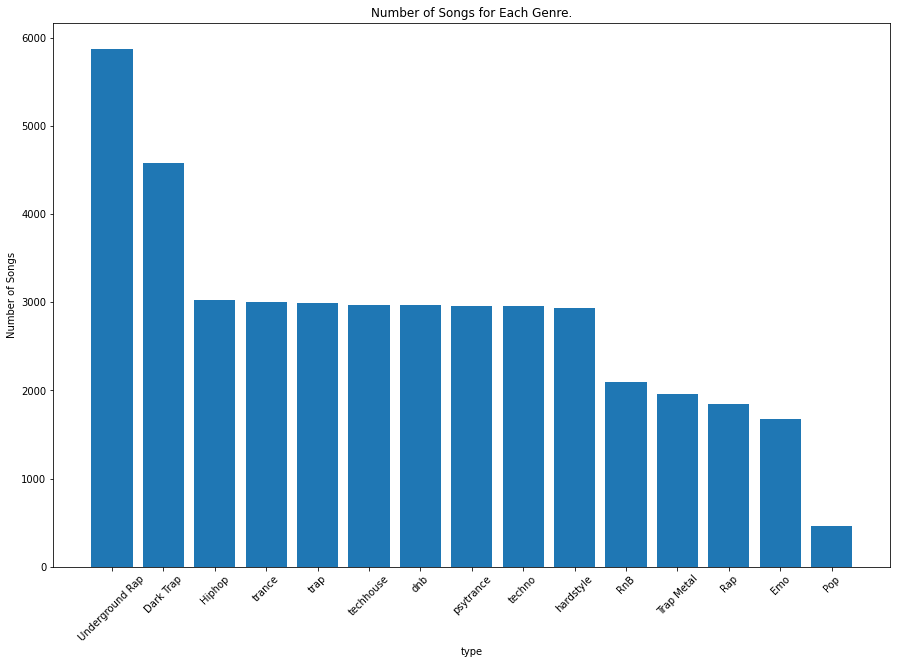

In [365]:
plt.figure(figsize=(15,10))
plt.bar(height=df['genre'].value_counts(), x = df['genre'].value_counts().index)
plt.xlabel('type')
plt.ylabel('Number of Songs')
plt.title('Number of Songs for Each Genre.')
plt.xticks(rotation= 45)
plt.savefig('../imgs/Gernre_dist.png', dpi= 400, bbox_inches= 'tight')


### EDA

In [366]:
#sns.PairGrid(df[df['genre'] == 0])

In [367]:
#genre specific dataframes for use in eda
# df_0 = df[df['genre'] == 0]
# df_1 = df[df['genre'] == 1]
# df_2 = df[df['genre'] == 2]
# df_3 = df[df['genre'] == 3]
# df_4 = df[df['genre'] == 4]
# df_5 = df[df['genre'] == 5]
# df_6 = df[df['genre'] == 6]
# df_7 = df[df['genre'] == 7]
# df_8 = df[df['genre'] == 8]
# df_9 = df[df['genre'] == 9]
# df_10 = df[df['genre'] == 10]
# df_11 = df[df['genre'] == 11]
# df_12 = df[df['genre'] == 12]
# df_13 = df[df['genre'] == 13]
# df_14 = df[df['genre'] == 14]

df.groupby(by='genre').mean().index

Index(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'],
      dtype='object', name='genre')

In [368]:
# plt.figure(figsize=(15,10))
# plt.bar(height= df.groupby(by='genre').mean()['danceability'].sort_values(ascending=False),
#         x = df.groupby(by='genre').mean()['danceability'].sort_values(ascending=False).index)
# plt.xlabel('Genre')
# plt.ylabel('Danceability Percentage')
# plt.title('Average Danicibility Percentage for Each Genre.')
# plt.savefig('../imgs/danceability_dist.png', dpi= 400)

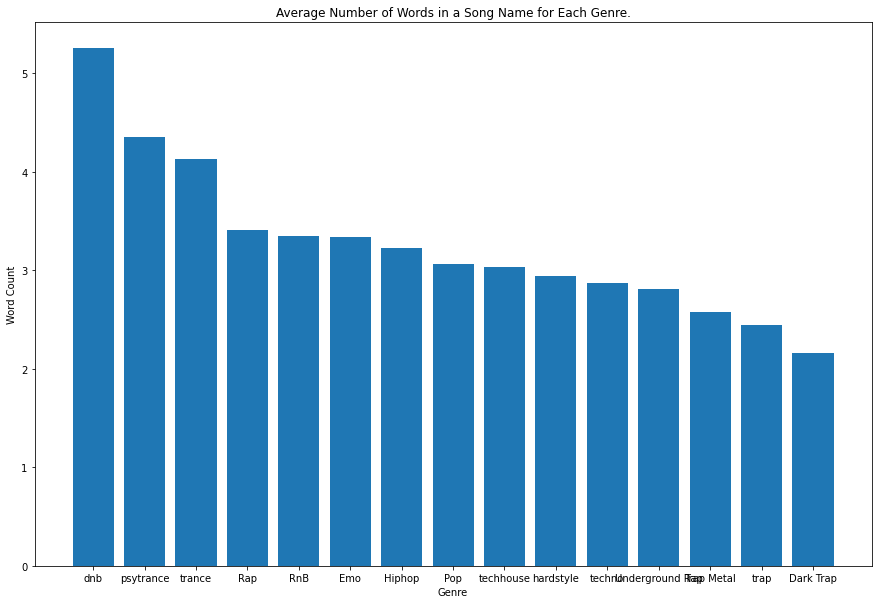

In [369]:
plt.figure(figsize=(15,10))
plt.bar(height= df.groupby(by='genre').mean()['song_name_word_count'].sort_values(ascending=False),
        x = df.groupby(by='genre').mean()['song_name_word_count'].sort_values(ascending=False).index)
plt.xlabel('Genre')
plt.ylabel('Word Count')
plt.title('Average Number of Words in a Song Name for Each Genre.')
plt.savefig('../imgs/word_count_dist.png', dpi= 400)

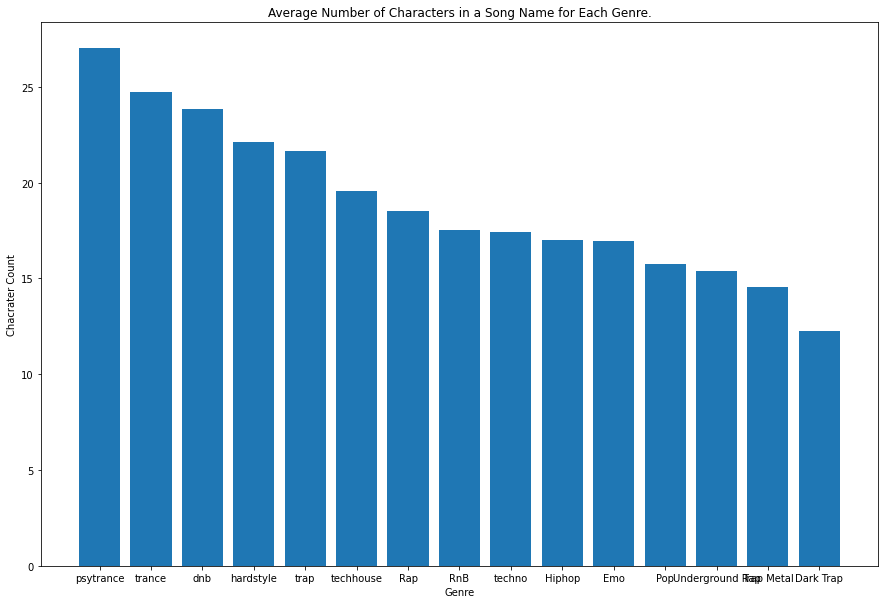

In [370]:
plt.figure(figsize=(15,10))
plt.bar(height= df.groupby(by='genre').mean()['song_name_char_count'].sort_values(ascending=False),
        x = df.groupby(by='genre').mean()['song_name_char_count'].sort_values(ascending=False).index)
plt.xlabel('Genre')
plt.ylabel('Chacrater Count')
plt.title('Average Number of Characters in a Song Name for Each Genre.')
plt.savefig('../imgs/word_char_dist.png', dpi= 400)


Distributions


In [371]:
# sns.pairplot(df)

<AxesSubplot:xlabel='key', ylabel='loudness'>

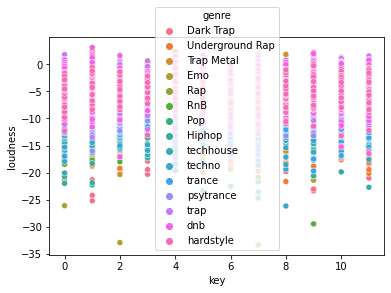

In [372]:
sns.scatterplot(x= df['key'], y = df['loudness'], hue= df['genre'])

#### Prep Data for Modeling

1. Change target, genre, to be a numerical number instead of a string.  This is a method of integer encoding.

In [373]:
classes = list(df['genre'].unique())
#create dictionary of classes and the numerical number associated with each class.
target_dict = {classes[i]:i for i in range(len(classes))}
target_dict

#change target from strings to ints.

df['genre'] = df['genre'].replace(target_dict)

2. Create dummy columns for all non-numerical data. This will allow the model to use object-oriented data, as this
process creates columns where each unique object within the root columns is represented by either a one or zero.


In [374]:
df = pd.get_dummies(df, columns=['key','time_signature','mode'], drop_first= True)

3. Save file as clean_data.csv

In [375]:
df.to_csv('../data/clean_data.csv', index= False)